# Import

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepairing the data

The data is processed to be used 
        RainToday and RainTomorrow are comverted to int from binary 

While unsable data has been dropped
        (WindGustDir, WindDir9am, WindDir3pm, Location)

In [48]:
df = pd.read_csv("updated_weatherAUS.csv")

df = df.drop("Date", axis=1)
df["RainToday"] = (df["RainToday"] == "Yes").astype("int16")
df["RainTomorrow"] = (df["RainTomorrow"] == "Yes").astype("int16")
df = df.drop("WindGustDir", axis=1)
df = df.drop("WindDir9am", axis=1)
df = df.drop("WindDir3pm", axis=1)

df = df.drop("Location", axis=1)

# Feature Scaling

In [49]:
df_scaled = df

m,n = df_scaled.shape

# Min-Max Scaling (Normalization)
"""
for i in range(n):
    series = df_scaled.iloc[:, i]
    min_value = series.min()
    max_value = series.max()
    df_scaled.iloc[:, i] = (series - min_value) / (max_value - min_value)
"""


#standardization Scaling 

for i in range(n):
    x= df_scaled.iloc[:, i]
    mean_value = x.mean()
    std_deviation = abs(x.std())
    stanadardized_x = (x - mean_value) / std_deviation
    df_scaled.iloc[:, i]= stanadardized_x


df_scaled.head()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.205232,-0.016205,-0.203580,-0.746513,-0.845386,0.407794,0.681280,0.628380,0.160852,-1.251086,0.307740,0.312969,1.679571,-0.875690,0.017246,0.085732,-0.529794,-0.529762
1,-0.720310,0.280779,-0.275096,-0.746513,-0.845386,0.407794,-1.097761,0.409058,-1.125606,-1.116764,0.317090,0.315234,-0.874267,-0.875690,0.061940,0.413154,-0.529794,-0.529762
2,0.128103,0.361775,-0.275096,-0.746513,-0.845386,0.527920,0.570090,0.847702,-1.411485,-0.892894,0.307418,0.318146,-0.874267,-0.219634,0.628054,0.269088,-0.529794,-0.529762
3,-0.442647,0.672258,-0.275096,-0.746513,-0.845386,-0.793460,-0.319430,-1.016536,-1.077959,-1.519731,0.339660,0.331411,-0.874267,-0.875690,0.196019,0.701286,-0.529794,-0.529762
4,0.837685,1.252727,-0.155903,-0.746513,-0.845386,0.227606,-0.764190,0.189736,0.684964,-0.758571,0.317735,0.309410,1.360341,1.748534,0.151326,1.120387,-0.529794,-0.529762


# Initialization of Centroids
Assigning random datapoints from the training data to each centroid as initial value

In [50]:
def initialize_centroids(data, k):
	centroids_indices = np.random.choice(len(data), k, replace=False)
	centroids = data.iloc[centroids_indices]
	return centroids 


# Assigning all the points to the centroids

Assign each data point to the closest centroid

In [51]:
def assign_clusters(data, centroids):
	#Calculates euclidian distance of all data points
	distances = np.linalg.norm(data.values[:, np.newaxis] - centroids.values, axis=2)

	#assigns centroid with minimum distance to all data points
	clusters = np.argmin(distances, axis=1)
	return clusters

# Updating the centroids
Update centroids based on the mean of data points in each cluster


In [52]:
def update_centroids(data, clusters, k):
	new_centroids = []
	for i in range(k):
		cluster_points = data[clusters == i]
		if len(cluster_points) > 0:
			new_centroid = cluster_points.mean(axis=0)
			new_centroids.append(new_centroid)
	return pd.DataFrame(new_centroids, columns=data.columns)

# Main K-means Clustering Algorithm

In [53]:
def k_means(data, k, epochs=100):
	centroids = initialize_centroids(data, k)

	for _ in range(epochs):
		clusters = assign_clusters(data, centroids)
		new_centroids = update_centroids(data, clusters, k)
	
		# Check for convergence
		if new_centroids.equals(centroids):
			print("Converged")
			break
		
		centroids = new_centroids

	return clusters, centroids

# Main thread

In [54]:
#From the elbow Plot
k = 4

clusters, centroids = k_means(df_scaled, k)

df["Cluster"] = clusters
df_scaled["Cluster"] = clusters


Converged


# Cost function (Distortion Function)

In [55]:

def cost(data,k):
	_, centroids = k_means(data, k)
	distance = np.linalg.norm(data.values[:, np.newaxis] - centroids.values, axis=2)
	cost = np.sum(np.argmin(distance) ** 2) 
	return cost

In [56]:
Cost=[]
for i in range(1, 6):
        Cost.append(cost(df_scaled, i))
print(Cost)

Converged
Converged
Converged
Converged
Converged
[14834509209, 31015436544, 139878992016, 248674760929, 2828963344]


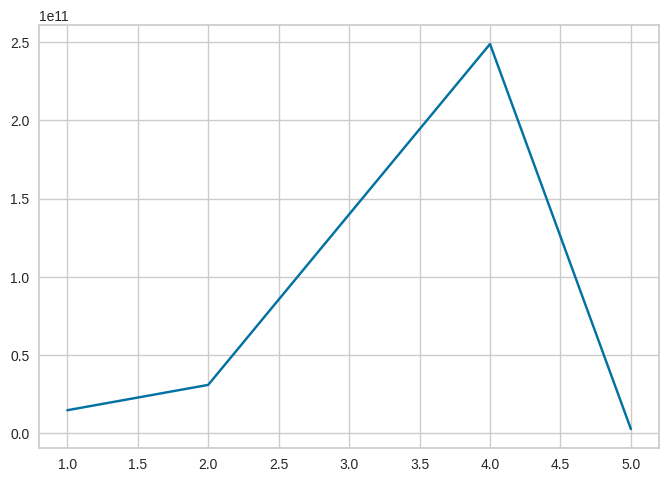

In [57]:
iter = np.linspace(1, 5, 5)
plt.plot(iter, Cost)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explic

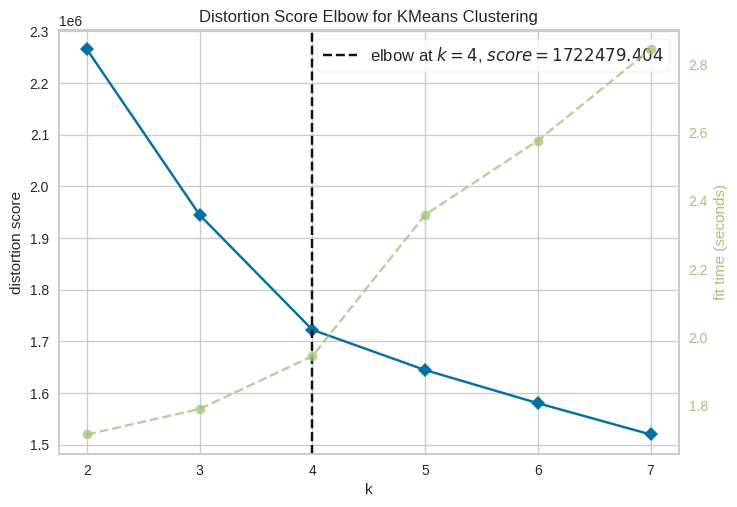

In [58]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2, 8))
visualizer.fit(df_scaled)  
visualizer.show()    
plt.show()


# PCA plot

In [59]:
from sklearn.decomposition import PCA

In [60]:
cols = df_scaled.columns
pca = PCA(n_components=2)
X = df_scaled[cols[:18]].values
transformed_x = pca.fit_transform(X)

transformed_x= np.column_stack((transformed_x, clusters))

transformed_x= pd.DataFrame(transformed_x)

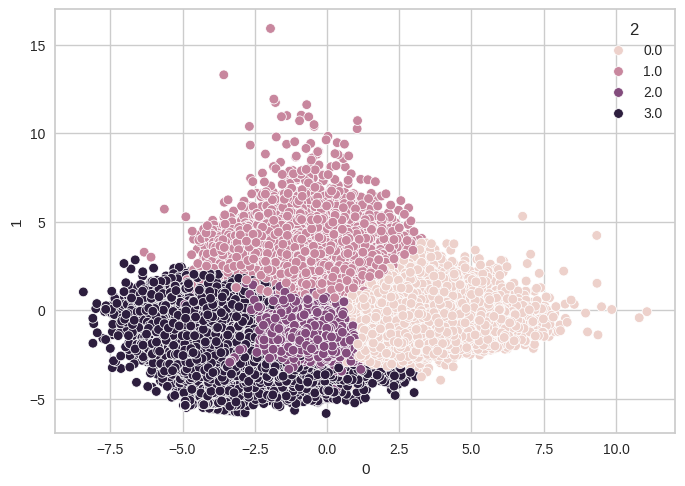

In [61]:
sns.scatterplot(x=0, y=1, data=transformed_x, hue=2)
plt.show()